# _kNN_: _k_-Vecinos Cercanos

Es un algoritmo de aprendizaje supervisado en el que se asigna a un punto de prueba, la clase mayoritaria entre los _k_ vecinos más próximos, utilizando una métrica de distancia. En la siguiente figura se puede ver un ejemplo para _k_ = 5

## Clase KNN

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
df_iris = load_iris(as_frame=True).frame
X = df_iris[ ['petal length (cm)', 'petal width (cm)'] ]
y = df_iris.target

In [3]:
print('Etiquetas de clase:', np.unique(y))

Etiquetas de clase: [0 1 2]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1,  stratify = y) #lo que hace esta linea es dividir los datos en datos de
                                                                                                                    #entremiento y de test, en este caso es 70-30. (test_size)
#El random_state es la semilla
#el shuffle es para mezclar los datos asi te aseguras que no haya sesgo
#stratify basicamente lo que hace es que no hayan 90 datos de un tipo y solo 10 de otro por ej, los nivela.

In [5]:
# Normalización de los datos / estandarizacion
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_test_std

array([[ 0.89820289,  1.44587881],
       [-1.16537974, -1.04507821],
       [-1.33269725, -1.17618121],
       [ 0.39625036,  0.65926081],
       [ 0.34047786,  0.2659518 ],
       [ 0.11738784,  0.1348488 ],
       [ 1.12129291,  0.79036381],
       [ 0.39625036,  0.3970548 ],
       [ 0.84243039,  0.92146681],
       [-1.38846976, -1.04507821],
       [-1.27692475, -1.04507821],
       [ 0.61934037,  0.79036381],
       [-1.33269725, -1.30728421],
       [-0.27301968, -0.2584602 ],
       [-1.33269725, -1.30728421],
       [ 0.56356787,  0.2659518 ],
       [ 0.73088538,  1.44587881],
       [ 0.39625036,  0.3970548 ],
       [ 0.28470535,  0.1348488 ],
       [ 0.78665788,  1.05256981],
       [ 1.17706541,  1.18367281],
       [-1.33269725, -1.43838721],
       [ 0.34047786,  0.2659518 ],
       [ 0.61934037,  1.05256981],
       [ 0.22893285,  0.1348488 ],
       [ 0.50779537,  0.5281578 ],
       [-0.4403372 , -0.1273572 ],
       [ 1.0655204 ,  1.70808482],
       [-1.22115225,

In [6]:
class KNN:
    """Clasificador KNN.

    Parámetros
    ------------
    k : int
        número de vecinos cercanos
    p : int
        valor para selección de métrica (1: Manhattan, 2: Euclídea)
    """

    def __init__(self, k=3, p=2):
        self.k = k
        self.p = p

    def distancia(self, vec_1, vec_2, p=2):
        dim = len(vec_1)
        distance=0

        for d in range(dim):
            distance += (abs(vec_1[d]-vec_2[d]))**p

        distance = (distance)**(1/p)
        return distance

    def fit(self, X, y):
        """Entrenamiento del clasificador kNN, es un algoritmo 'perezoso'
        sólo almacena los datos y sus etiquetas
        Parameters
        ----------
        X : array
            vector de características.
        y : array
            clases asociadas a los datos.
        """
        self.X = np.array(X) # hay una posibilidad de que esto haya pasarlo a array
        self.y = np.array(y)
        self.n_datos = X.shape[0] #estaria tomando el numero total de datos

    def predict(self, X_new):
        """Predice la clase de los nuevos datos.
        
        Parameters
        ----------
        X_new : array
            Nuevos vectores de características para clasificar.
        
        Returns
        -------
        y_pred : array
            Clases predichas para los nuevos datos.
        """
        y_pred = []
        for vec in X_new:
            # Calcular las distancias a todos los puntos de entrenamiento
            distancias = [self.distancia(vec, x_train, self.p) for x_train in self.X]
            
            k_distancias = np.argsort(distancias) # ordena de menor a mayor

            k_etiqueta= self.y[k_distancias[:self.k]]

            c= Counter(k_etiqueta).most_common(1)
            y_pred.append(c[0][0])

        return np.array(y_pred)

## Usamos el clasificador

In [7]:
# Creamos un objeto knn usando la clase implementada
knn = KNN(k=3)
# llamamos al método de entrenamiento ---> Datos de entrenamiento
knn.fit(X_train_std, y_train)


In [8]:
# Evaluamos el clasificador con los datos de prueba
y_pred = knn.predict(X_test_std)
# Comparamos nuestra predicción con los targets
(y_pred==y_test).sum()

np.int64(45)

A continuación vamos a utilizar una función `plot_decision_regions` implementada en el archivo `graficacion.py` de la carpeta `modulos` para graficar las regiones de clasificación.
Se va a crear un mapa de colores en función del resultado de la predicción de nuestro clasificador.
Utilizaremos la misma función con otros clasificadores. Notar que se pasa un clasificador como parámetro y que en su interior se hace una llamada al método `predict()` del clasificador.

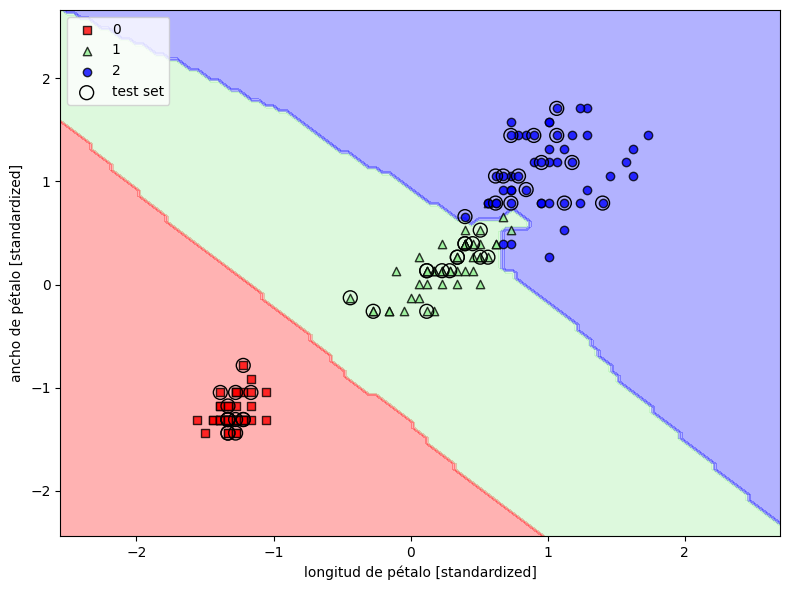

In [10]:
import matplotlib.pyplot as plt
from modulos.graficacion import plot_decision_regions

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plt.figure(figsize=(8,6))
plot_decision_regions( X=X_combined_std, y=y_combined, clasificador=knn, test_idx=range(105, 150), resolution=0.05)
plt.xlabel('longitud de pétalo [standardized]')
plt.ylabel('ancho de pétalo [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
y_pred = knn.predict(X_test_std)

In [12]:
def accuracy(y_pred, y_test):
    return np.sum( np.equal(y_pred, y_test) ) / len(y_test)

print(accuracy(y_pred, y_test))


1.0


# KNN usando _scikit-Learn_

### Cargamos los datos

El conjunto de datos en el archivo `prestamos.csv` muestra algunos registros de préstamos personales de LendingClub. LendingClub es líder en préstamos entre pares en el que grupos de inversionistas otorgan préstamos personales a individuos. El objetivo del análisis de este conjunto de datos es predecir el resultado de un nuevo préstamo potencial. Las opciones del resultado son: _pagado_ o _incumplido_.

In [13]:
df_prestamos = pd.read_csv("./1_datos/prestamos.csv", index_col=False)
df_prestamos.head()

,tasa de interes,plazo prestamo,fico limite inferior,fico limite superior,deudas_ingresos,estado
0,12.62,36,690.0,694.0,18.75,pagado
1,16.99,36,670.0,674.0,24.54,pagado
2,10.15,36,700.0,704.0,6.95,pagado
3,6.89,36,740.0,744.0,7.78,pagado
4,10.42,60,730.0,734.0,18.84,pagado


In [14]:
df_prestamos.info()
print("\n")
df_prestamos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134531 entries, 0 to 134530
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   tasa de interes       134531 non-null  float64
 1   plazo prestamo        134531 non-null  int64  
 2   fico limite inferior  134531 non-null  float64
 3   fico limite superior  134531 non-null  float64
 4   deudas_ingresos       134503 non-null  float64
 5   estado                134531 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.2+ MB




,tasa de interes,plazo prestamo,fico limite inferior,fico limite superior,deudas_ingresos
count,134531.000000,134531.000000,134531.000000,134531.000000,134503.000000
mean,13.264545,41.822182,696.100378,700.100542,18.254560
std,4.764991,10.287631,31.805769,31.806537,10.203921
min,5.310000,36.000000,660.000000,664.000000,0.000000
25%,9.750000,36.000000,670.000000,674.000000,11.790000
50%,12.740000,36.000000,690.000000,694.000000,17.640000
75%,16.010000,36.000000,710.000000,714.000000,24.030000
max,30.990000,60.000000,845.000000,850.000000,999.000000


### Dividimos los datos en entrenamiento y prueba

20% datos de prueba, utilice `random_state=42`, estratificar en función de la clase.


In [15]:
train_set, test_set = train_test_split(df_prestamos, test_size=0.2, random_state=42, stratify=df_prestamos["estado"])

# hacemos una copia del conjunto de entrenamiento
housing = train_set.copy()

### Separamos predictores de las etiquetas

In [16]:
x_train = housing.drop("estado", axis=1)
x_train_labels = housing["estado"].copy()

print('Etiquetas de clase:', np.unique(x_train_labels))

Etiquetas de clase: ['incumplido' 'pagado']


## **Hay datos faltantes?**


In [17]:
faltante = df_prestamos.isna().sum() #si hay NA los sume, basicamente un ftable de R
print(faltante,"\n")

datos_faltantes = df_prestamos[df_prestamos.isnull().any(axis=1)]
datos_faltantes.head() #Algunos datos faltantes

tasa de interes          0
plazo prestamo           0
fico limite inferior     0
fico limite superior     0
deudas_ingresos         28
estado                   0
dtype: int64 



,tasa de interes,plazo prestamo,fico limite inferior,fico limite superior,deudas_ingresos,estado
3728,13.59,60,670.0,674.0,NaN,pagado
14493,9.44,60,755.0,759.0,NaN,pagado
16066,21.49,60,690.0,694.0,NaN,pagado
25178,11.99,36,720.0,724.0,NaN,pagado
31581,9.92,36,710.0,714.0,NaN,pagado


In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") #Para remplazar los valores faltante con la mediana
imputer.fit(x_train)

SimpleImputer(strategy='median')

In [19]:
print(imputer.statistics_,"\n")

#Ahora se puede usar este imputador "entrenado" para transformar el conjunto de entrenamiento reemplazando los valores faltantes con las medianas calculadas:

X_train = imputer.transform(x_train) # me devuelve un numpy array
type(X_train)

print(imputer.feature_names_in_) # Muestra los nombres de las columnas que fueron pasadas al imputador

df_x_train_num = pd.DataFrame(X_train, columns=x_train.columns, index=x_train.index)
#null_rows_idx = x_train.isnull().any(axis=1)
#df_x_train_num.loc[null_rows_idx].head()

[ 12.74  36.   690.   694.    17.61] 

['tasa de interes' 'plazo prestamo' 'fico limite inferior'
 'fico limite superior' 'deudas_ingresos']


## Manejo de atributos categóricos 

In [20]:
x_train_cat = train_set.loc[:,["estado"]]
x_train_cat.head(8)

,estado
83472,incumplido
88058,pagado
106653,pagado
29514,pagado
42419,pagado
47181,pagado
1067,incumplido
94399,pagado


In [21]:
#Probamos clase ordinal de sckit-learn

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
x_train_cat_encoded = ordinal_encoder.fit_transform(x_train_cat)

x_train_cat_encoded[:8]

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.]])

In [22]:
#Clase one_hot
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
x_train_cat_1hot = cat_encoder.fit_transform(x_train_cat)
x_train_cat_1hot

x_train_cat_1hot.toarray() #

print(cat_encoder.feature_names_in_) #devuelve el nombre de la columna

print(cat_encoder.get_feature_names_out()) #devuelve un nombre de columna con cada estado

['estado']
['estado_incumplido' 'estado_pagado']


In [23]:
#Creamos un Data Frame con las clases ya transformadas a Dummy

df_x_train_cat_1hot = pd.DataFrame(x_train_cat_1hot.toarray(), columns=cat_encoder.get_feature_names_out(), index=x_train_cat.index)
print(df_x_train_cat_1hot)

#Concatenacion de Dataframe de las etiquetas con el que contiene las variables numericas

df_train = pd.concat([df_x_train_num, df_x_train_cat_1hot], axis=1)
df_train

        estado_incumplido  estado_pagado
83472                 1.0            0.0
88058                 0.0            1.0
106653                0.0            1.0
29514                 0.0            1.0
42419                 0.0            1.0
...                   ...            ...
89500                 0.0            1.0
49410                 0.0            1.0
39551                 0.0            1.0
113085                0.0            1.0
106878                1.0            0.0

[107624 rows x 2 columns]


,tasa de interes,plazo prestamo,fico limite inferior,fico limite superior,deudas_ingresos,estado_incumplido,estado_pagado
83472,10.49,60.0,715.0,719.0,15.04,1.0,0.0
88058,9.99,36.0,690.0,694.0,19.33,0.0,1.0
106653,12.35,36.0,685.0,689.0,10.29,0.0,1.0
29514,10.49,36.0,660.0,664.0,16.30,0.0,1.0
42419,10.64,36.0,695.0,699.0,18.61,0.0,1.0
...,...,...,...,...,...,...,...
89500,7.49,36.0,755.0,759.0,4.88,0.0,1.0
49410,14.99,36.0,690.0,694.0,17.28,0.0,1.0
39551,9.91,36.0,805.0,809.0,13.22,0.0,1.0
113085,7.07,36.0,760.0,764.0,10.57,0.0,1.0


## Mismo proceso para los datos de PRUEBA

In [24]:
faltante = test_set.isna().sum() #si hay NA los sume, basicamente un ftable de R
print(faltante,"\n")

tasa de interes         0
plazo prestamo          0
fico limite inferior    0
fico limite superior    0
deudas_ingresos         7
estado                  0
dtype: int64 



In [25]:
Y_test = test_set.copy()
Y_test

y_test = Y_test.drop("estado", axis=1)
y_test_labels = Y_test["estado"].copy()

#Imputamos datos faltantes

X_test = imputer.transform(y_test) # me devuelve un numpy array
df_x_test_num = pd.DataFrame(X_test, columns=y_test.columns, index=y_test.index)


#pasamos las variables "estado" a dummy y creamos un dataframe con las variables categoricas

x_test_cat = test_set.loc[:,["estado"]]
x_test_cat.head()

x_test_cat_1hot = cat_encoder.transform(x_test_cat)

df_test_cat = pd.DataFrame(x_test_cat_1hot.toarray(), columns=cat_encoder.get_feature_names_out(), index=x_test_cat.index)
df_test_cat


#Creamos el dataframe final para test
df_test = pd.concat([df_x_test_num, df_test_cat], axis=1)
df_test

,tasa de interes,plazo prestamo,fico limite inferior,fico limite superior,deudas_ingresos,estado_incumplido,estado_pagado
36825,10.42,36.0,670.0,674.0,18.48,0.0,1.0
105132,5.32,36.0,685.0,689.0,26.64,0.0,1.0
77178,12.62,36.0,665.0,669.0,15.18,0.0,1.0
91562,9.44,60.0,780.0,784.0,16.13,0.0,1.0
89722,10.99,36.0,700.0,704.0,27.30,0.0,1.0
...,...,...,...,...,...,...,...
54024,7.99,36.0,755.0,759.0,15.92,0.0,1.0
97769,10.49,36.0,665.0,669.0,16.67,0.0,1.0
36439,13.67,36.0,675.0,679.0,26.75,0.0,1.0
117739,18.25,36.0,685.0,689.0,25.21,0.0,1.0


**Es necesario escalar los datos?**

### Entrenamiento del clasificador [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

Antes de entrenar nuestro clasificador, vamos a dividir los datos de entrenamiento en un conjunto de validación `X_valid` y uno de entrenamiento nuevo. Para esto, tomemos las primeras 20000 muestras como conjunto de validación. No olvidar dividir también las etiquetas.

In [26]:
Y_train_target = df_train["estado_pagado"]
Y_train_target

# Dividir el conjunto de entrenamiento original en nuevo conjunto de entrenamiento y validación
X_valid = df_train[:20000]
y_valid = Y_train_target[:20000]

X_train_new = df_train[20000:]
y_train_new = Y_train_target[20000:]

#Pasamos a Array los data frame (Queda sujeta a revison para optimizar esta parte)
X_train_new = X_train_new.to_numpy()
y_train_new = y_train_new.to_numpy()
X_valid_array = X_valid.to_numpy()


In [39]:
from sklearn.neighbors import KNeighborsClassifier

#probamos el clasificador con k=3
knn_clasificador = KNeighborsClassifier(n_neighbors=3)

# Entrenamos el clasificador con el conjunto de entrenamiento
knn_clasificador.fit(X_train_new, y_train_new)

# Predecir las etiquetas en el conjunto de validación
y_pred_valid = knn_clasificador.predict(X_valid_array)


calcule la tasa de aciertos de las predicciones del clasificador (aciertos/total de etiquetas)

In [40]:
# Calcular el numero de aciertos
aciertos = (y_pred_valid == y_valid).sum()

total_etiquetas = len(y_valid)

#Calculamos la tasa de aciertos
tasa_aciertos = aciertos / total_etiquetas
print(f"Tasa de aciertos del clasificador: {tasa_aciertos * 100:.2f}%")

Tasa de aciertos del clasificador: 97.36%


In [30]:
def accuracy(y_pred, y_test):
    return np.sum( np.equal(y_pred, y_test) ) / len(y_test)

print(accuracy(y_pred_valid, y_valid))

0.97365


In [31]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid, y_pred_valid)
accuracy

0.97365

Utilice los datos de validación para estimar un valor adecuado de K. Para esto, grafique la tasa de aciertos (accuray) en función de valores crecientes de K. Utilice la función [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [32]:
presiciones = []
#con los 20k datos tarda 56s aprox
k_values = range(1, 21) #rango

for k in k_values:
    # Crea y entrena el clasificador con el valor actual de K
    knn_clasificador = KNeighborsClassifier(n_neighbors=k)
    knn_clasificador.fit(X_train_new, y_train_new)
    
    # Predecir las etiquetas en el conjunto de validacion
    y_pred_valid = knn_clasificador.predict(X_valid_array)
    
    #Calculamos el accuracy
    accuracy = accuracy_score(y_valid, y_pred_valid)
    presiciones.append(accuracy) #la guardamos

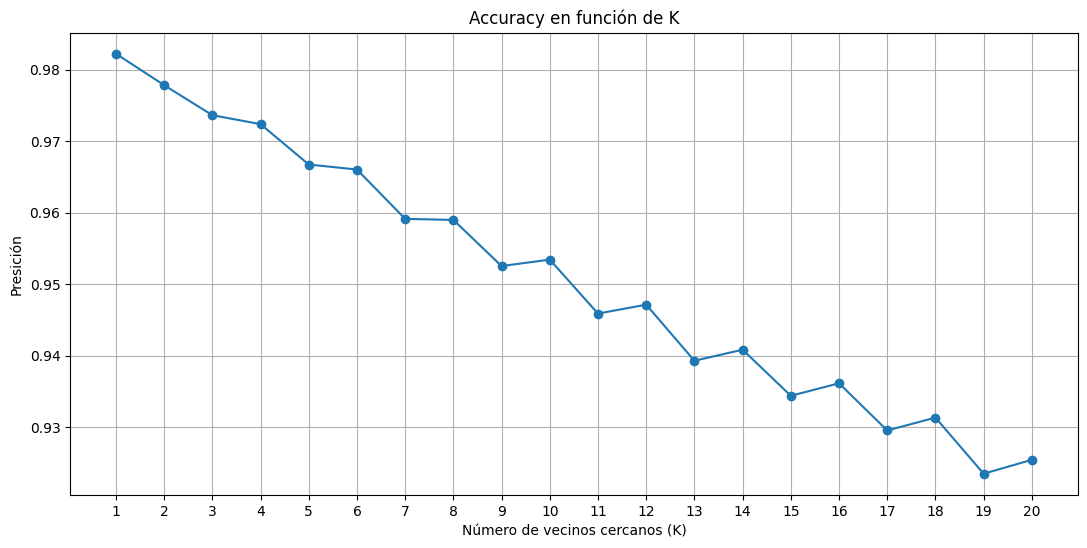

In [33]:
# Graficar la tasa de aciertos en función de K
plt.figure(figsize=(13, 6))
plt.plot(k_values, presiciones, marker="o")
plt.title("Accuracy en función de K")
plt.xlabel("Número de vecinos cercanos (K)")
plt.ylabel("Presición")
plt.xticks(k_values)
plt.grid(True)
plt.show()

Seleccione el valor de K a partir del cual el clasificador presenta un desempeño adecuado con los datos de validación. Entrene un nuevo clasificador con este valor de K y evalúe el resultado con los datos de prueba.

In [35]:
#ENTRENAMOS EL CLASIFICADOR KNN
knn_clasificador = KNeighborsClassifier(n_neighbors=2)
knn_clasificador.fit(X_train_new, y_train_new)

# VALIDAR EL MODELO USANDO EL CONJUNTO DE VALIDACION
y_pred_valid = knn_clasificador.predict(X_valid_array)

Verificamos el accuracy

In [36]:
accuracy = accuracy_score(y_valid, y_pred_valid)
accuracy

0.97785